# Importing libraries

In [1]:
import pandas as pd # for data exploration
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for data visualization

# Uploading and reading data

In [2]:
df=pd.read_csv("Training Data Set.csv") # upload the data
df.head()  # read the first 5 rows of the data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,7/27/12,100
1,Product_0979,Whse_J,Category_028,1/19/12,500
2,Product_0979,Whse_J,Category_028,2/3/12,500
3,Product_0979,Whse_J,Category_028,2/9/12,500
4,Product_0979,Whse_J,Category_028,3/2/12,500


In [3]:
df.shape # size of data

(859877, 5)

The data consist of 859877 observations and 5 columns

# Explanation of variables

##### 1. Product Code: a unique code assigned to each product. The manufacturer uses the unique code as an identifier for the product. e.g instead of Fanta 2L Orange, the manufacturer can use F2O as an identifier
##### 2. Warehouse: A unique identifier for each of the 4 warehouses that the manufacturer has
##### 3. Product Category: A product category is a way of grouping similar products together. e.g. Product_1721 and Product_1719 are different but are similar and hence, they have the same Product Category which is Category_003. Think of it as Coke and Fanta, different products but similar and hence will have the same product category .
##### 4. Date: The date the order was placed by the warehouse. Date ranges from Jan 2011 to Dec 2015
##### 5. Order_Demand: The quantity that was ordered by the warehouse. This is the variable that will be forecast for the 12 months in 2016 and January 2017.

In [4]:
def uniq_value(df):
    # counting unique values per column
    for column in df.columns:
        print(column + ":"+ str((df[column].nunique()*100)/30557)[:4]+ "%")
uniq_value(df)

Product_Code:6.98%
Warehouse:0.01%
Product_Category:0.10%
Date:4.58%
Order_Demand:11.6%


The above result shows that there is no variable with only unique entries

In [5]:
#group Product Code per Warehouse by the taking the sum of Order demand
df=df.groupby(['Product_Code','Warehouse','Product_Category','Date']).sum().reset_index()
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0001,Whse_A,Category_005,1/10/12,3000
1,Product_0001,Whse_A,Category_005,1/10/14,100
2,Product_0001,Whse_A,Category_005,1/16/14,3000
3,Product_0001,Whse_A,Category_005,1/18/13,2000
4,Product_0001,Whse_A,Category_005,1/20/15,100


##### The data above shows that each product belong to only on category and different products can belong to the same category.
##### We did a grouping to see which quantity of each product each warehouse orders

In [6]:
#The product code is our key variable so we will set it as index
df.set_index('Product_Code') # set product code as index

,Warehouse,Product_Category,Date,Order_Demand
Product_Code,,,,
Product_0001,Whse_A,Category_005,1/10/12,3000
Product_0001,Whse_A,Category_005,1/10/14,100
Product_0001,Whse_A,Category_005,1/16/14,3000
Product_0001,Whse_A,Category_005,1/18/13,2000
Product_0001,Whse_A,Category_005,1/20/15,100
...,...,...,...,...
Product_2172,Whse_J,Category_005,6/22/12,200
Product_2172,Whse_J,Category_005,6/30/15,600
Product_2172,Whse_J,Category_005,6/6/13,500


In [7]:
df.isna() # checking missing data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
513950,False,False,False,False,False
513951,False,False,False,False,False
513952,False,False,False,False,False
513953,False,False,False,False,False


In [8]:
df.isnull().sum()/len(df)*100 # percentage of missing data per column

Product_Code        0.0
Warehouse           0.0
Product_Category    0.0
Date                0.0
Order_Demand        0.0
dtype: float64

The above resilts shows that there is no missing data

In [9]:
#def fill_missing_data(df):
    #df.Date.fillna(df.Date.mode()[0],inplace=True) # fill missing data using the mode imputation method
   # return df
#fill_missing_data(df)

In [10]:
#df.Date.isnull().sum()/len(df)*100 # rechecking percentage of missing data in the Date column

# Visualization using countplot
##### Counplot counts the number of occurence of each value within a variable and them plot the cummulative.

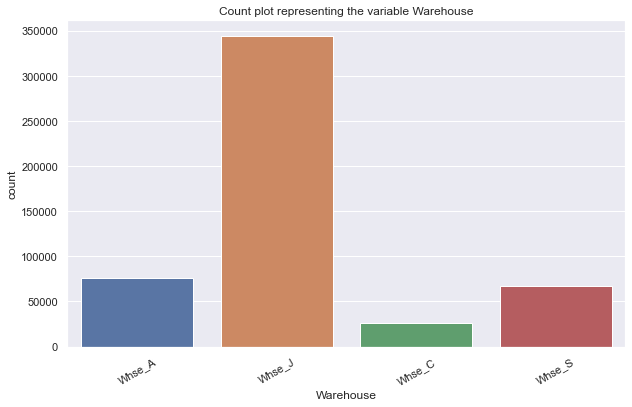

In [11]:
#visualization of Warehouse
def visualize_var(df,var,n,m):
    plt.figure(figsize=(n,m))
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(x=var, data=df) 
    ax.tick_params(axis='x', rotation=30)
    ax.set_title('Count plot representing the variable'+ " " +var)
    pass
'''
explanation of parameters:
df= name of your dataframe
var: str name of variable you want to visualize
n: int lenght of x-axis
m: int lenght of y-axis
                        '''
visualize_var(df,'Warehouse',10,6)

##### The above plot is a countplot of the variable Warehouse. It shows that Whse_J is the warehouse which has the highest frequence of   ordering products . It  also shows that  the warehouse Whse_C has the least frequence of ordering products. Where the warehouses Whse_S and Whse_A have almost the same frequence of ordering products.

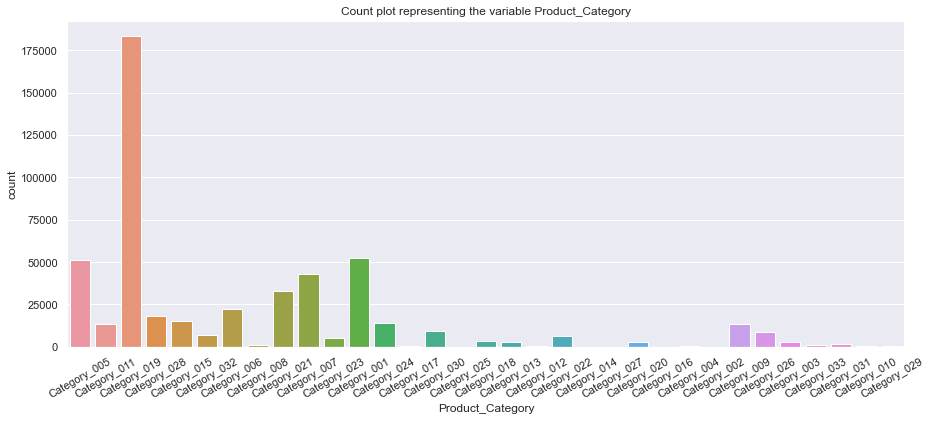

In [12]:
visualize_var(df,'Product_Category',15,6) # visualize the distribution of products categories in all the dataframe.

The above plot show that products from the category 019 are the one most ordered frequently

In [14]:
def filter_column_per_value(df,col,value):
    df_filter =df[df[col]==value]
    return df_filter
'''
explanation of parameters:
df= name of your dataframe
col: str name of variable you want to filter
value: str name of value you want to filter
                        '''
#df_filter.head()

'\nexplanation of parameters:\ndf= name of your dataframe\ncol: str name of variable you want to filter\nvalue: str name of value you want to filter\n                        '

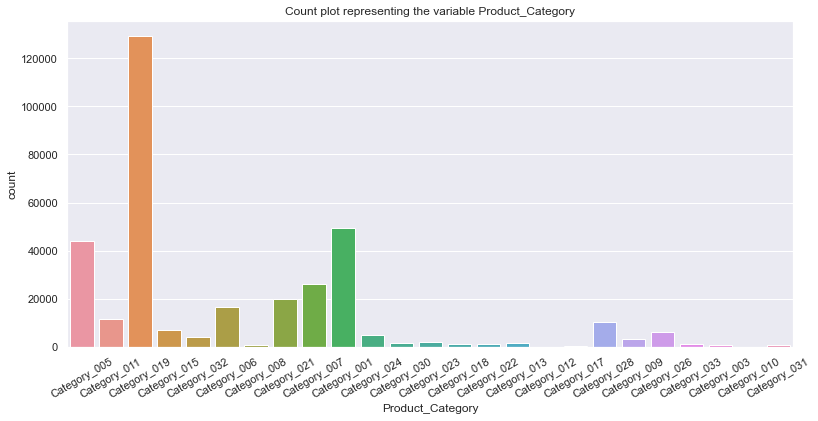

In [15]:
#visualization of Product_Category in the warehouse Whse_J.
df_filter=filter_column_per_value(df,'Warehouse','Whse_J')
visualize_var(df_filter,'Product_Category',13,6)

##### The above plot shows that most of products in the warehouse Whse_J belong to the category Category_019. The remaining products generally belong to categories: Category_001, Category_005, Category_006, Category_007, Category_011, and Category_021.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


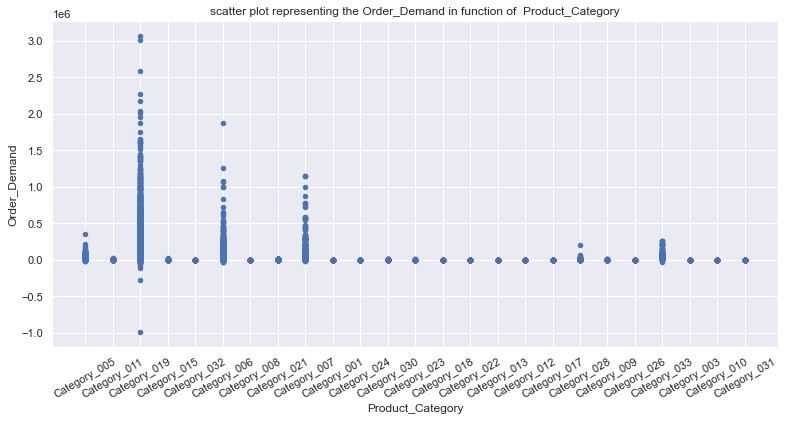

In [16]:
def quantity_of_oder_demand_per_prod_cat(df, var_1,var_2,m,n):
    ax=df.plot.scatter(x=var_1, y=var_2, figsize=(m,n))
    ax.tick_params(axis='x', rotation=30)
    ax.set_title('scatter plot representing the'+ ' '+var_2+' '+ 'in function of '+ " " +var_1)
    plt.show()
quantity_of_oder_demand_per_prod_cat(df_filter,'Product_Category','Order_Demand',13,6)
#ratio between the produt category 019 in the warehouse Whse_J and the produt category 019 in all the warehouses

From the above plot we can conclude that most of products in the warehouse Whse_J belong to the category 019 in term of ordering frequence and ordered quantity.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


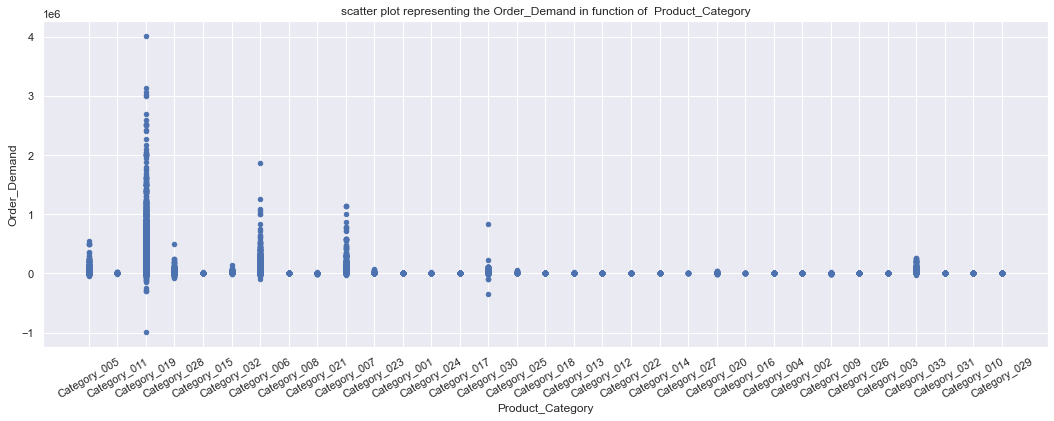

In [17]:
quantity_of_oder_demand_per_prod_cat(df,'Product_Category','Order_Demand',18,6)

In [18]:
#ratio between the produt category 019 in the warehouse Whse_J and the produt category 019 in all the warehouses
df_filter[df_filter.Product_Category=='Category_019'].shape[0]/df[df.Product_Category=='Category_019'].shape[0]

0.70471117320875

The above result shows that around 70% of produt category 019 is ordered by the warehouse Whse_J.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


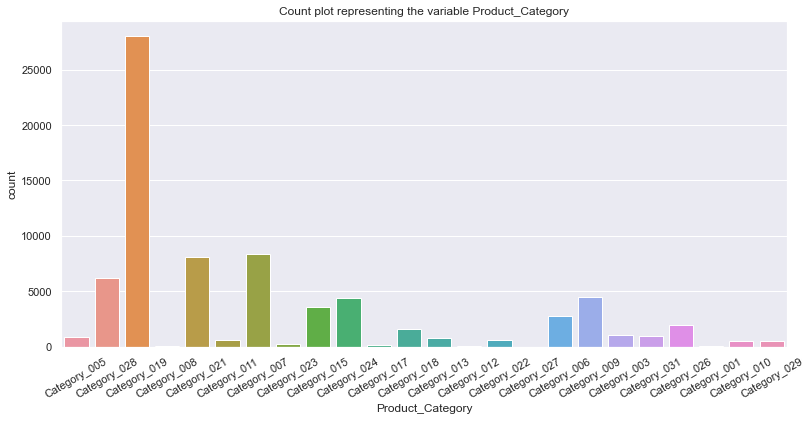

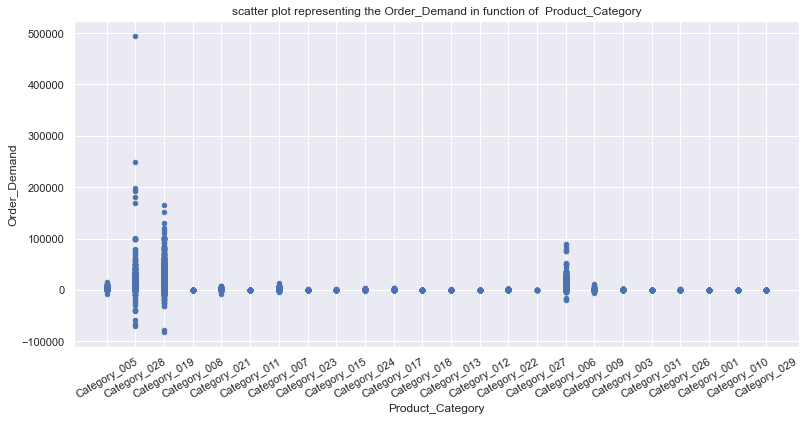

0.152851154870541

In [19]:
#visualization of Product_Category in the warehouse Whse_A.
df_filter=filter_column_per_value(df,'Warehouse','Whse_A')
visualize_var(df_filter,'Product_Category',13,6)
quantity_of_oder_demand_per_prod_cat(df_filter,'Product_Category','Order_Demand',13,6)
#ratio between the produt category 019 in the warehouse Whse_A and the produt category 019 in all the warehouses
df_filter[df_filter.Product_Category=='Category_019'].shape[0]/df[df.Product_Category=='Category_019'].shape[0]

The plots above show that the product category 019 is the most ordered in term of ordering frequence and order quantity by the Warehouse A but with a very small portion (15%) compare the total orders of product category 019 by all the Warehouses.. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


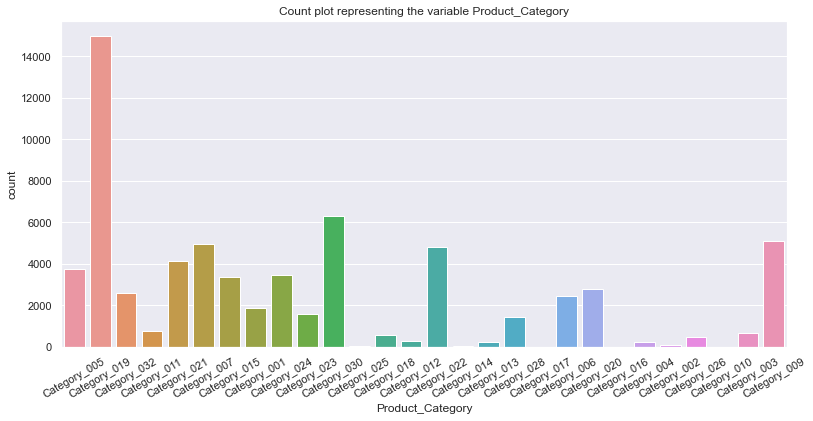

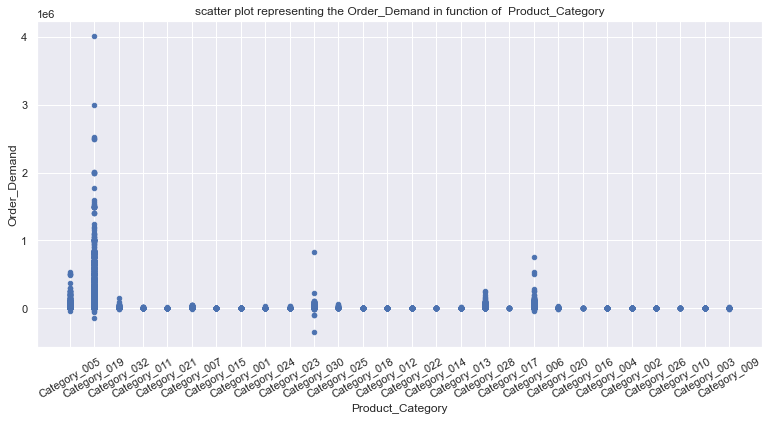

0.08159411430816924

In [20]:
#visualization of Product_Category in the warehouse Whse_S.
df_filter=filter_column_per_value(df,'Warehouse','Whse_S')
visualize_var(df_filter,'Product_Category',13,6)
quantity_of_oder_demand_per_prod_cat(df_filter,'Product_Category','Order_Demand',13,6)
#ratio between the produt category 019 in the warehouse Whse_S and the produt category 019 in all the warehouses
df_filter[df_filter.Product_Category=='Category_019'].shape[0]/df[df.Product_Category=='Category_019'].shape[0]

The plots above show that the product category 019 is the most ordered in term of ordering frequence and order quantity by the Warehouse S but with a very small portion (8%) compare the total orders of product category 019 by all the Warehouses.. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


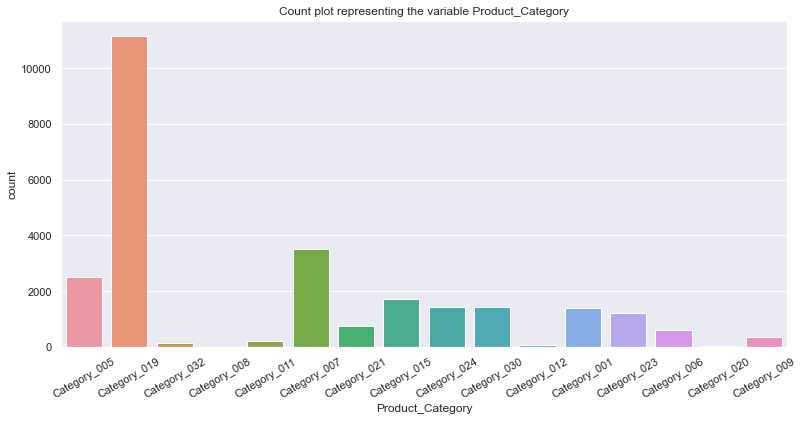

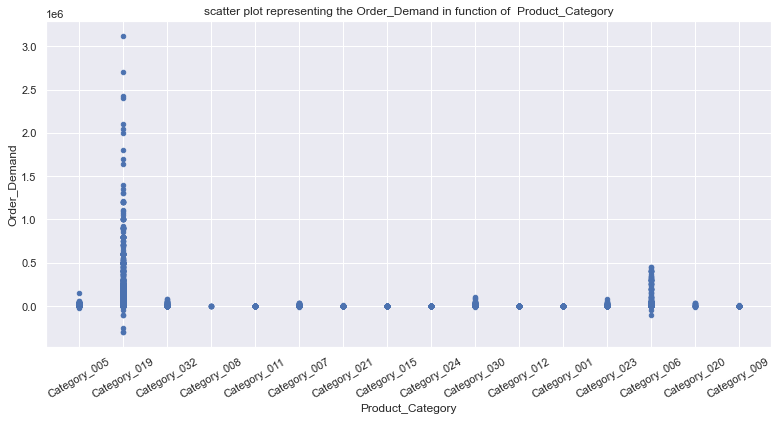

0.060843557612539845

In [21]:
#visualization of Product_Category in the warehouse Whse_C.
df_filter=filter_column_per_value(df,'Warehouse','Whse_C')
visualize_var(df_filter,'Product_Category',13,6)
quantity_of_oder_demand_per_prod_cat(df_filter,'Product_Category','Order_Demand',13,6)
#ratio between the produt category 019 in the warehouse Whse_C and the produt category 019 in all the warehouses
df_filter[df_filter.Product_Category=='Category_019'].shape[0]/df[df.Product_Category=='Category_019'].shape[0]

The plots above show that the product category 019 is the most ordered in term of ordering frequence and order quantity by the Warehouse C but with a very small portion (6%) compare the total orders of product category 019 by all the Warehouses.. 

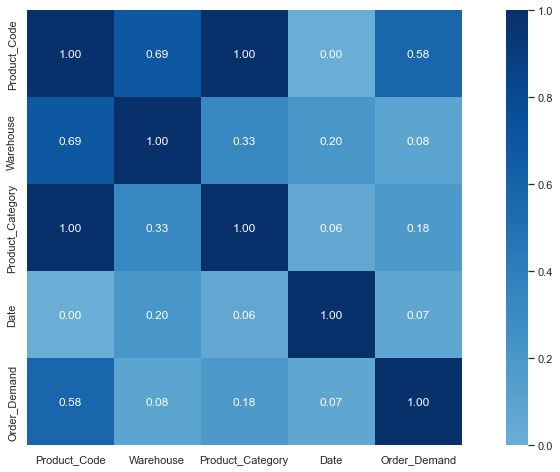

In [22]:
# using dython library
from dython.nominal import associations
# Step 1: Instantiate a figure and axis object
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)
r = associations(df, ax = ax, cmap = "Blues")

The plot above shows that there is a positive strong correlation between Product Code and Warehouse and also between Product Code and Oder demand. There is no correlation between Product Code and Date and a weak relationship between Oder demand and Warehouse and there is also a weak relationship between Date and Product Category.

In [24]:
def convert_data(df):
    
#identify all categorical variables
    column = df[df.columns[1:]].select_dtypes(['object']).columns
#convert all categorical variables to numeric  
    df[column]=df[column].apply(lambda x: pd.factorize(x)[0])
    #dummies=pd.get_dummies(df[column])
    #df=pd.concat([df,dummies],axis=1)
    #df.drop(column,axis=1,inplace=True)
    #X.drop(unuseful_columns,axis=1,inplace=True)
    df=df.set_index('Product_Code')
    return df
df= convert_data(df)

In [25]:
df.head()

,Warehouse,Product_Category,Date,Order_Demand
Product_Code,,,,
Product_0001,0,0,0,3000
Product_0001,0,0,1,100
Product_0001,0,0,2,3000
Product_0001,0,0,3,2000
Product_0001,0,0,4,100


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
def spli_data(df):
# split the data in target variable and other variables
    y = df['Order_Demand']
    X = df.loc[:, df.columns != 'Order_Demand']
#converting continue output variable to categorical
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
# split the data in train and test to start training the models
    x_train, x_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)
    return x_train, x_test, y_train,y_test
x_train, x_test, y_train,y_test= spli_data(df)

In [215]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0).fit(x_train, y_train)
y_train_pred=regressor.predict(x_train)
y_test_pred=regressor.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))

 RMSE for train:455.0497088295536
RMSE for test :485.57770234671733


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_forest = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(x_train, y_train)
y_train_pred=regressor_forest.predict(x_train)
y_test_pred=regressor_forest.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train,y_train_pred, squared = False)
rmse_test = mean_squared_error(y_test,y_test_pred, squared = False)
print(' RMSE for train:'+str(rmse_train))
print('RMSE for test :'+str(rmse_test))